# RESEARCH ON MOVIES: BUDGET, GENDER DIVERSITY AND PUBLISHED ERA - WHAT DETERMINE A FILM’S GROSS PROFIT?

*Group Member: Huy Pham, Hao Jiang, Kerie Galvez, Steven Tsai*

## Project Proposal

In [1]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(cowplot)
library(dplyr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## 1 Background

Despite the increasing attention to lack of diversity in Hollywood, women has traditionally and continued to be underrepresented in movies (Citation). A very popular method used to gauge women’s involvement in movies is the Bechdel test. In order to pass the Bechdel test, a movie needs: 1) at least two women, 2) talk to each other and 3) conversation topic in 2) must be something other than a man (Citation). Simple enough, but shockingly 40% of movies in 2018 failed this test (Citation)

We suspect this is due to lack of awareness of the association between women’s involvement and films’ success among film producers. To confirm if there is a statistical association between the two, we will carry out a MLR model with response variable being a movie’s gross income and independent variables being the Bechdel test, budget, and published era.


We suspect this is due to lack of awareness of the association between women’s involvement and films’ success among film producers. To confirm if there is a statistical association between the two, we will carry out a MLR model with response variable being a movie’s gross income and independent variables being the Bechdel test, budget, and published era.


## 2 Dataset Description

## 3 Preliminary Results

### Cleaning and Wrangling of Data

In [2]:
download.file("https://github.com/fivethirtyeight/data/raw/master/bechdel/movies.csv", destfile = "movies.csv")
movie_data <- read.csv("movies.csv")
head(movie_data)

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013.,domgross_2013.,intgross_2013.,period.code,decade.code
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>
1,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380,42195766,2013FAIL,13000000,25682380,42195766,1,1
2,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714,40868994,2012PASS,45658735,13611086,41467257,1,1
3,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035,158607035,2013FAIL,20000000,53107035,158607035,1,1
4,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460,132493015,2013FAIL,61000000,75612460,132493015,1,1
5,2013,tt0453562,42,men,men,FAIL,40000000,95020213,95020213,2013FAIL,40000000,95020213,95020213,1,1
6,2013,tt1335975,47 Ronin,men,men,FAIL,225000000,38362475,145803842,2013FAIL,225000000,38362475,145803842,1,1


Since the year, budget, domgross, intgross, decadeCode are the variables that we interested, we need to consider the null value between them. Also, the domgross and the intgross should be integer rather than the chr type, so we use the as.intger to transfer them.

In [3]:
clean_movie_data <- movie_data %>%
                    mutate(domgross = as.integer(domgross),
                           intgross = as.integer(intgross),
                           decadeCode = decade.code) %>%
                    filter(!is.na(year&budget&domgross&intgross&decadeCode)) %>%
                    mutate(tot_gross = domgross + intgross) %>%
                    # mutate(binary = as_factor(binary),
                    #        domgross = as_factor(domgross),
                    #        intgross = as_factor(intgross),
                    #        tot_gross = as_factor(tot_gross),
                    #        decadeCode = as_factor(decadeCode),) %>%
                    select(year,imdb,budget,binary,domgross,intgross,decadeCode)
head(clean_movie_data)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion to integer range”


,year,imdb,budget,binary,domgross,intgross,decadeCode
,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>
1,2013,tt1711425,13000000,FAIL,25682380,42195766,1
2,2012,tt1343727,45000000,PASS,13414714,40868994,1
3,2013,tt2024544,20000000,FAIL,53107035,158607035,1
4,2013,tt1272878,61000000,FAIL,75612460,132493015,1
5,2013,tt0453562,40000000,FAIL,95020213,95020213,1
6,2013,tt1335975,225000000,FAIL,38362475,145803842,1


### Estimation

##### *At first*, the average domestic gross profit (nominal dollars) (E[domgross]) was calculated based on the historical data.

In [4]:
average_domgross <- clean_movie_data %>%
                  summarise(mean = mean(domgross)) %>%
                  pull()
average_domgross

[1] 68440339

`geom_smooth()` using formula 'y ~ x'



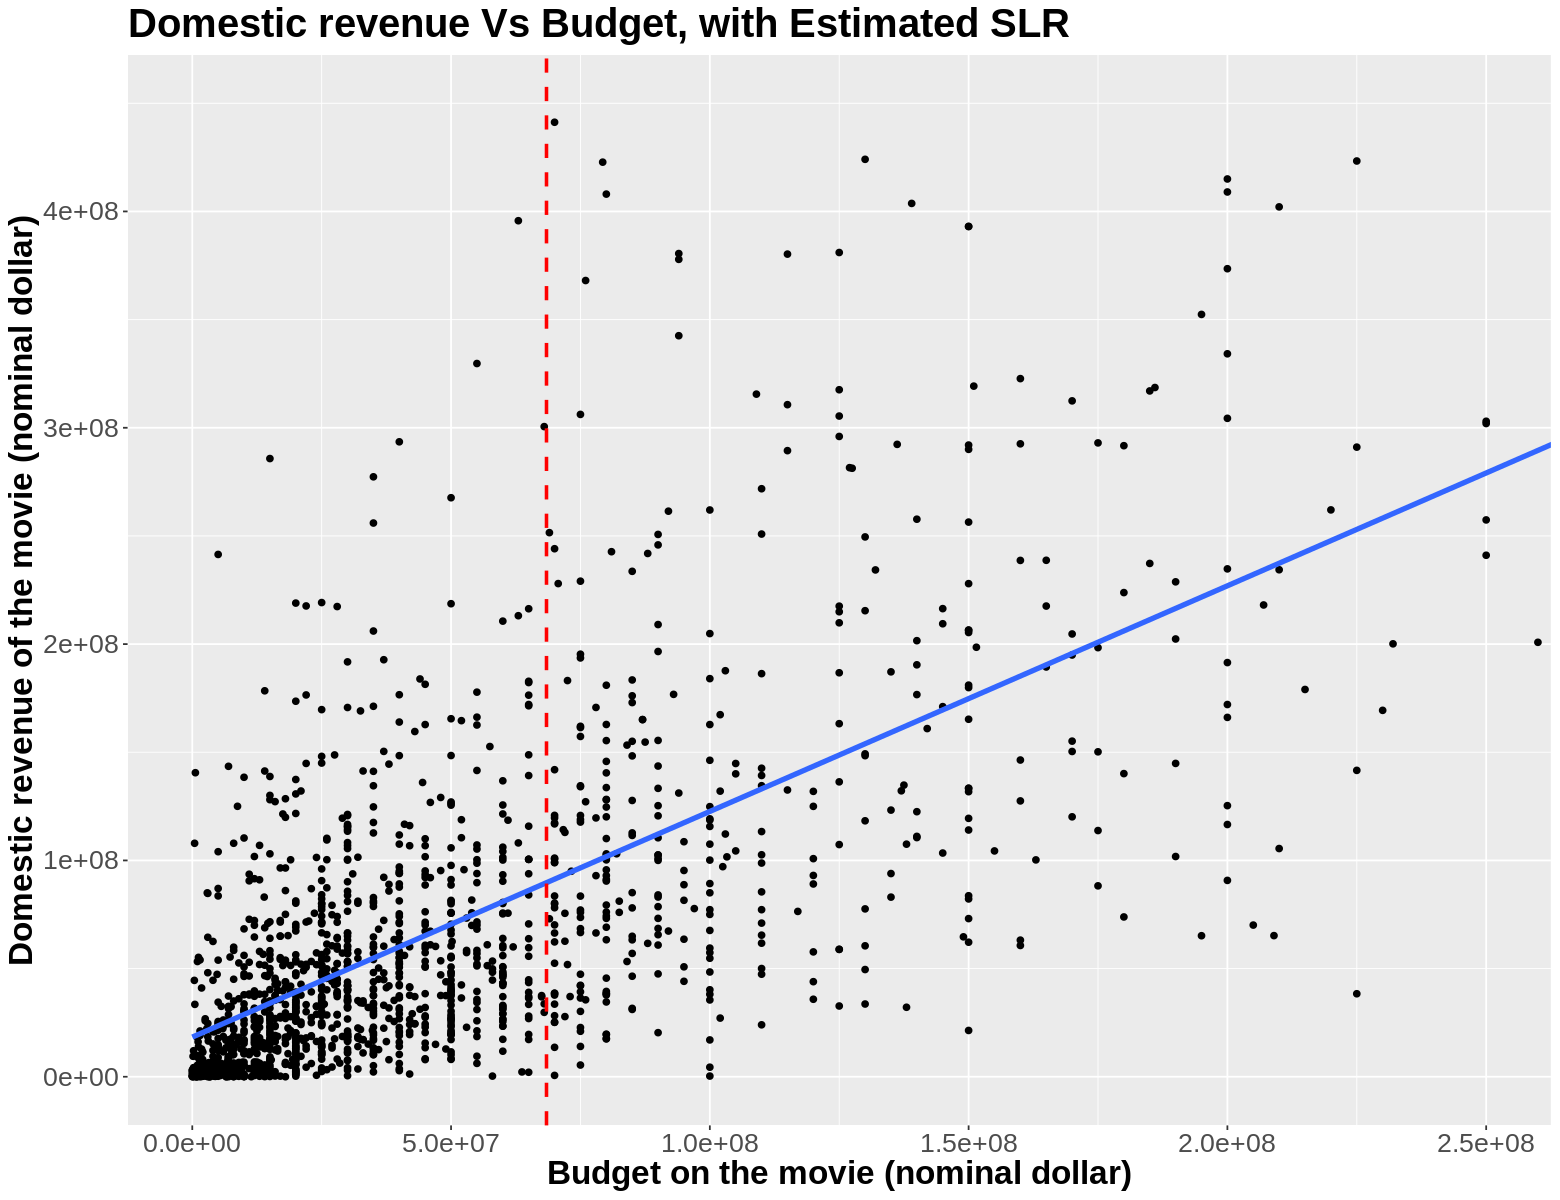

In [5]:
options(repr.plot.width = 13, repr.plot.height = 10)

SLR_budget_dom <- clean_movie_data %>%
              ggplot(aes(x = budget, y = domgross)) +
              geom_point() +
              geom_smooth(aes(x= budget, y = domgross), method = lm, se = FALSE, size = 1.5) +
              coord_cartesian(xlim = c(0, 2.5*10^8), ylim = c(0, 4.5*10^8)) +
              geom_vline(aes(xintercept = average_domgross), color="red", linetype = "dashed", size = 1)+
              xlab("Budget on the movie (nominal dollar)") +
              ylab("Domestic revenue of the movie (nominal dollar)") +
              ggtitle("Domestic revenue Vs Budget, with Estimated SLR") +
              theme(
              text = element_text(size = 20),
              plot.title = element_text(face = "bold"),
              axis.title = element_text(face = "bold")
              )

SLR_budget_dom

Fig 1: Domestic revenue Vs Budget

##### From the figure 1, there is a upward trending of the ratio between the budget on the movie (nominal dollar) and the domestic revenue of the movie (nominal dollar).

##### *Secondly*, the ratio of the movies successfully passed the Bechdel test for each year was computed to explore the trending of women in movies.

In [6]:
ratio <- clean_movie_data %>%
         group_by(year) %>%
         summarise(success = mean(binary == "PASS"))
tail(ratio)

year,success
<int>,<dbl>
2008,0.5102041
2009,0.3305785
2010,0.4687500
2011,0.4180328
2012,0.4302326
2013,0.4693878


`geom_smooth()` using formula 'y ~ x'



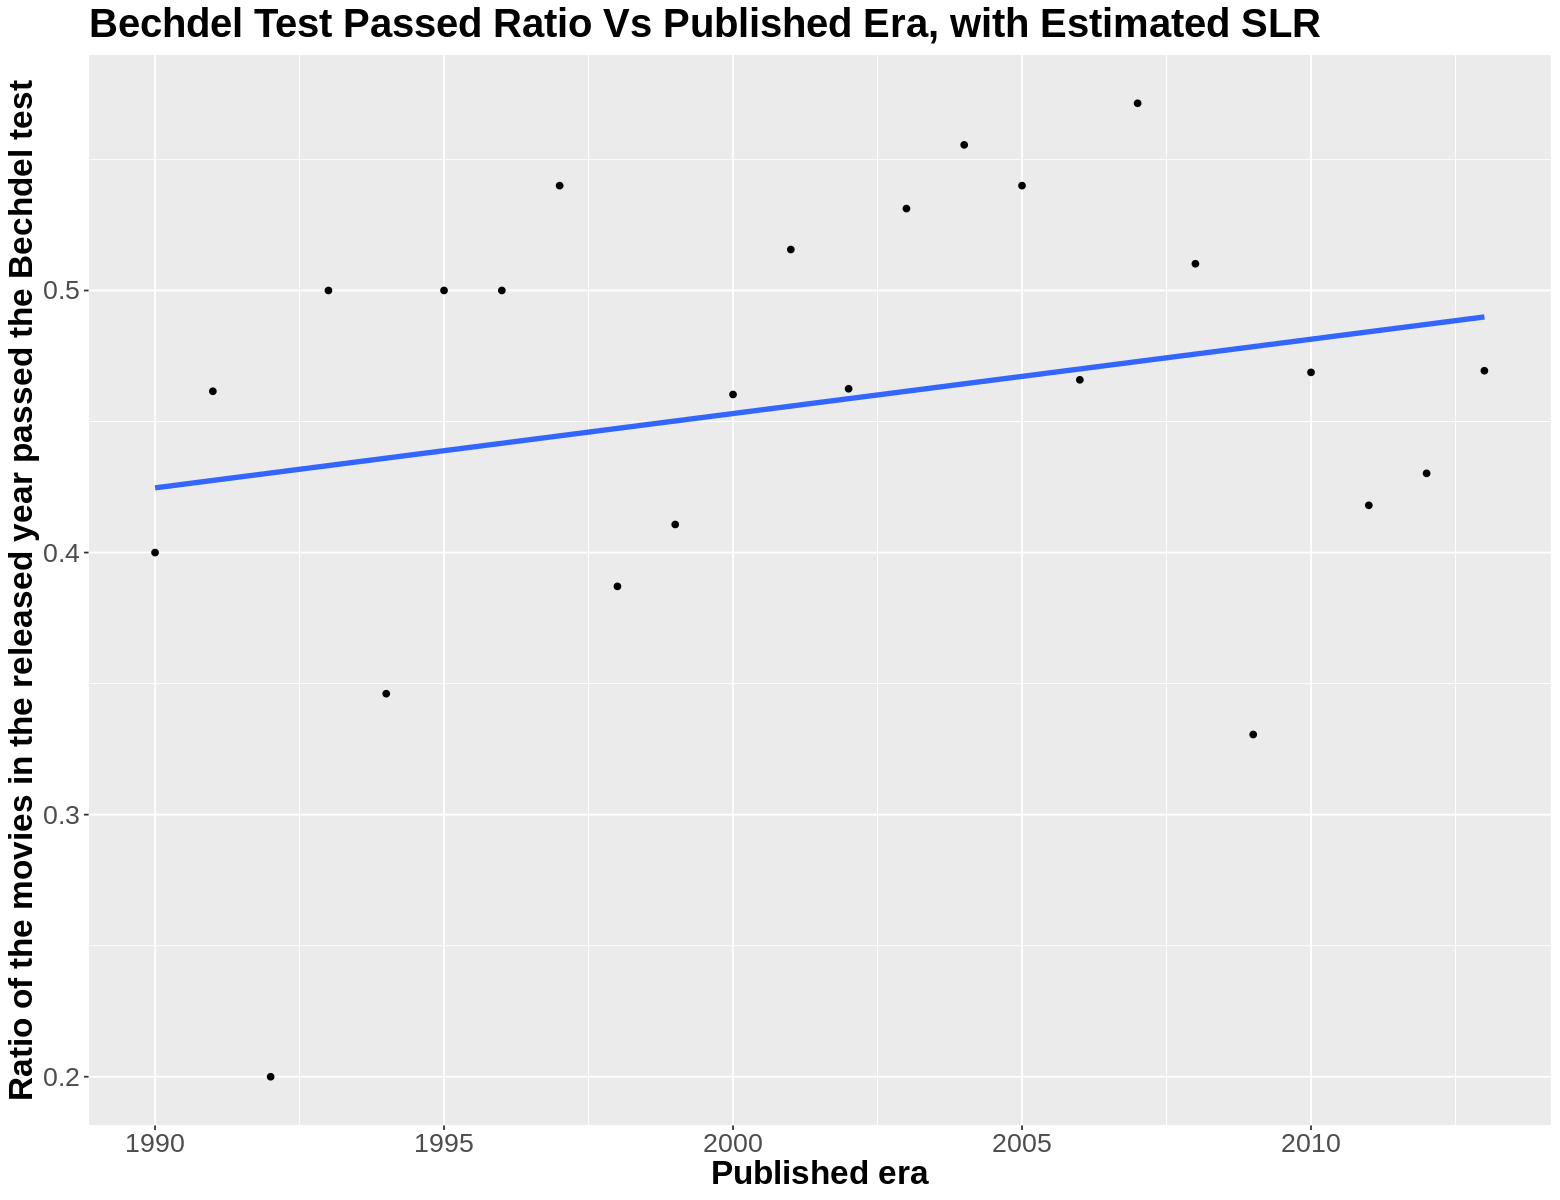

In [7]:
SLR_year_testpass <- ratio %>%
              ggplot(aes(x = year, y = success)) +
              geom_point() +
              geom_smooth(aes(x= year, y = success), method = lm, se = FALSE, size = 1.5) +
              xlab("Published era") +
              ylab("Ratio of the movies in the released year passed the Bechdel test") +
              ggtitle("Bechdel Test Passed Ratio Vs Published Era, with Estimated SLR") +
              theme(
              text = element_text(size = 20),
              plot.title = element_text(face = "bold"),
              axis.title = element_text(face = "bold")
              )
SLR_year_testpass

Fig 2: Bechdel Test Passed Ratio Vs published era

##### From the figure 2, there is a upward trending of the ratio between the ratio of the movies in the released year passed the Bechdel test and the publichsed era.

decadeCode,success
<int>,<dbl>
1,0.4470046
2,0.4861279
3,0.4345238


`geom_smooth()` using formula 'y ~ x'



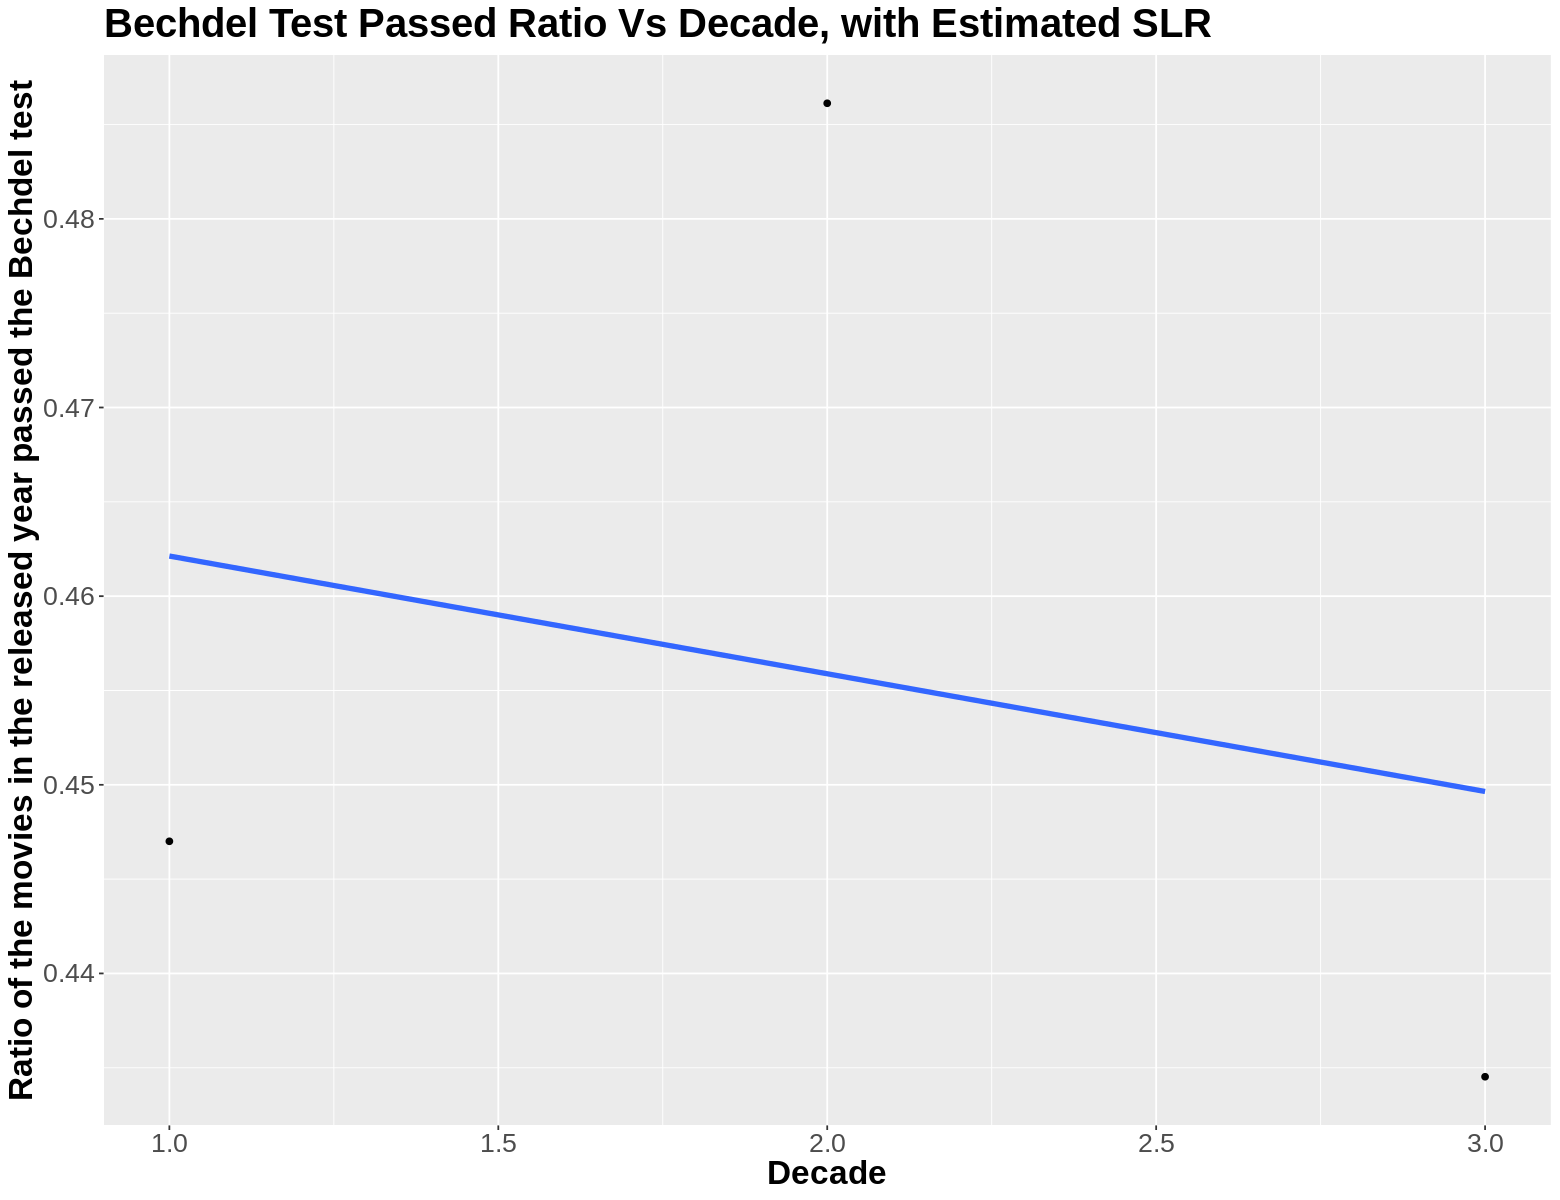

In [8]:
#Not sure whether we need

decaderatio <- clean_movie_data %>%
         group_by(decadeCode) %>%
         summarise(success = mean(binary == "PASS"))
decaderatio

SLR_decade_testpass <- decaderatio %>%
              ggplot(aes(x = decadeCode, y = success)) +
              geom_point() +
              geom_smooth(aes(x= decadeCode, y = success), method = lm, se = FALSE, size = 1.5) +
              xlab("Decade") +
              ylab("Ratio of the movies in the released year passed the Bechdel test") +
              ggtitle("Bechdel Test Passed Ratio Vs Decade, with Estimated SLR") +
              theme(
              text = element_text(size = 20),
              plot.title = element_text(face = "bold"),
              axis.title = element_text(face = "bold")
              )
SLR_decade_testpass

`geom_smooth()` using formula 'y ~ x'



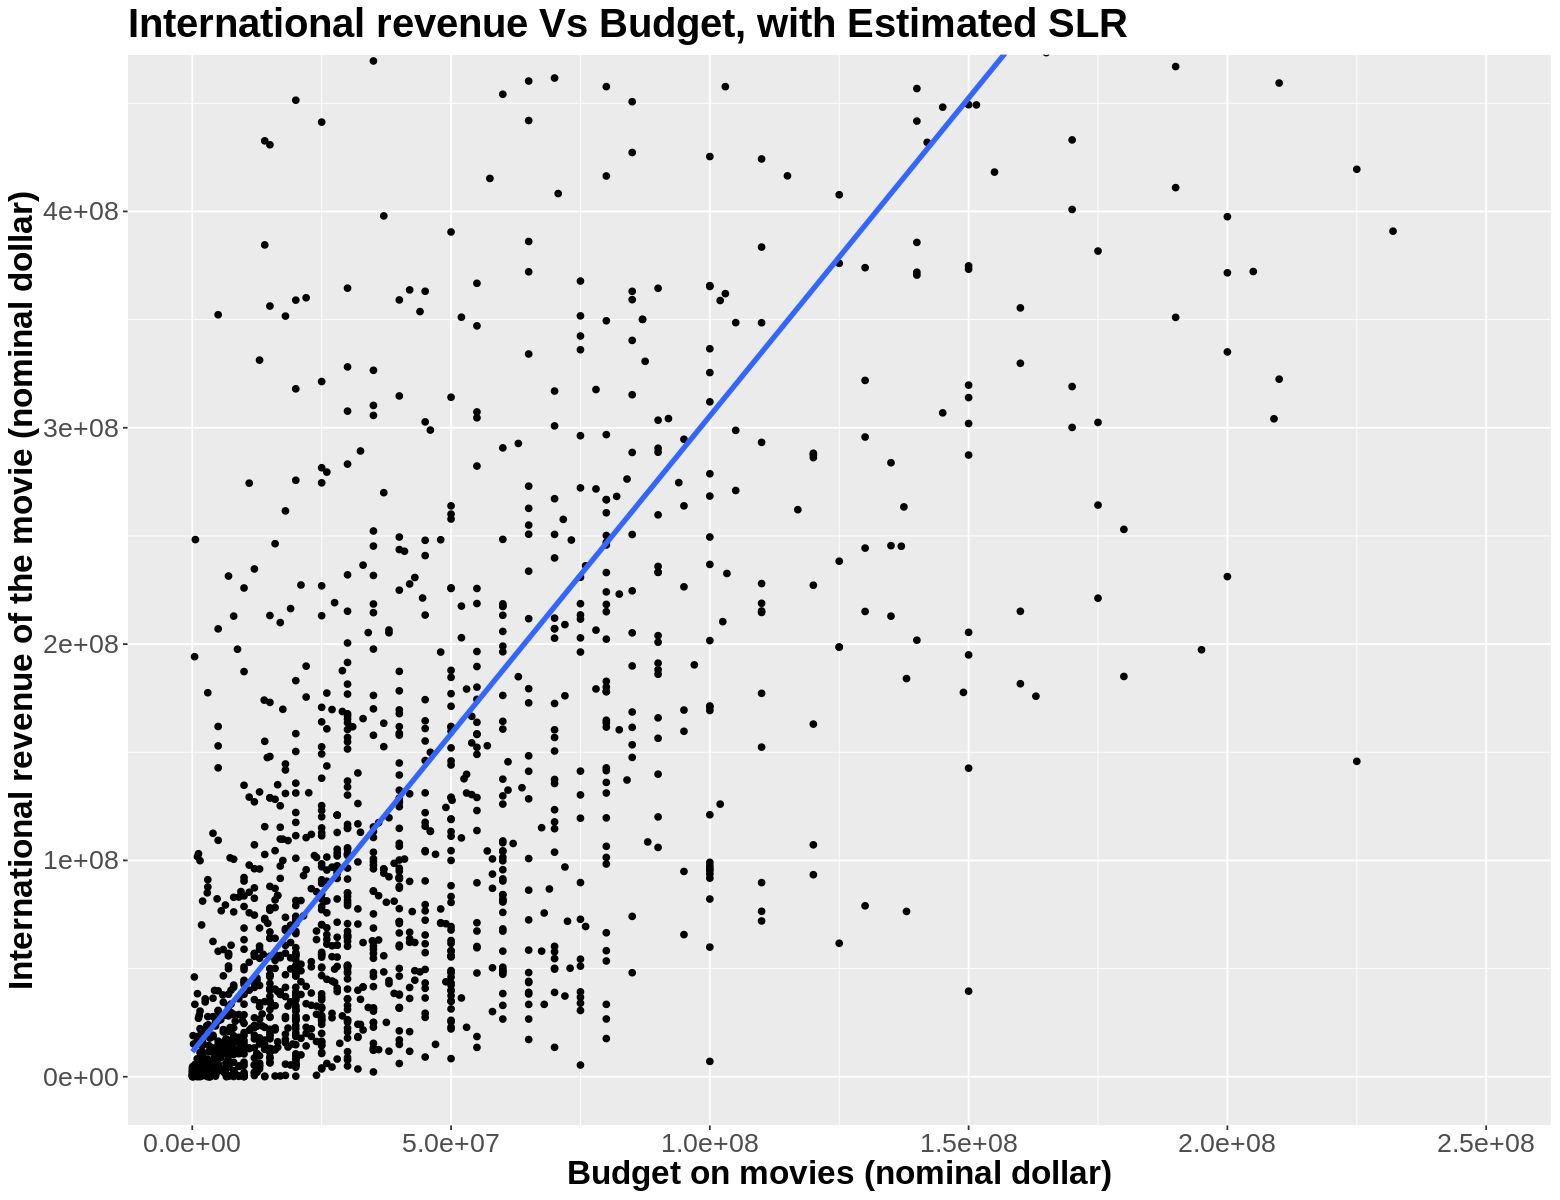

In [9]:
SLR_budget_int <- clean_movie_data %>%
              ggplot(aes(x = budget, y = intgross)) +
              geom_point() +
              geom_smooth(aes(x= budget, y = intgross), method = lm, se = FALSE, size = 1.5) +
              coord_cartesian(xlim = c(0, 2.5*10^8), ylim = c(0, 4.5*10^8)) +
              xlab("Budget on movies (nominal dollar)") +
              ylab("International revenue of the movie (nominal dollar)") +
              ggtitle("International revenue Vs Budget, with Estimated SLR") +
              theme(
              text = element_text(size = 20),
              plot.title = element_text(face = "bold"),
              axis.title = element_text(face = "bold")
              )

SLR_budget_int